In [4]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor
trainData = datasets.MNIST(root='data', transform=ToTensor(), download=True)
testData = datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True)

In [6]:
# number of pictures
len(trainData), len(testData)

(60000, 10000)

In [7]:
classNames = trainData.classes
classNames, len(classNames)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

In [8]:
image, label = testData[0]
label, classNames[label], image.shape

(7, '7 - seven', torch.Size([1, 28, 28]))

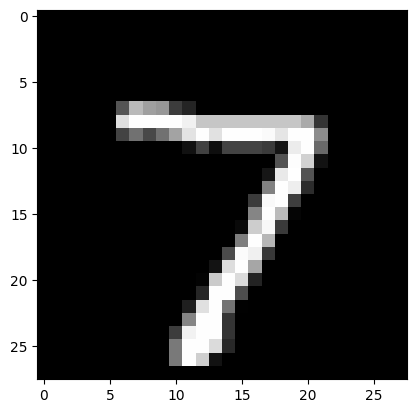

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap='gray')

In [10]:
from torch.utils.data import DataLoader
batchSize = 32
trainDL = DataLoader(trainData, batchSize)
testDL = DataLoader(testData, batchSize)
len(trainDL), len(testDL), len(trainDL) * batchSize, len(testDL) * batchSize

(1875, 313, 60000, 10016)

In [20]:
firstBatch = next(iter(trainDL))
firstBatchImages, firstBatchLabels = firstBatch
firstBatchImages.shape, firstBatchLabels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [21]:
from torch import nn
image = firstBatchImages[0]
flatten = nn.Flatten()
flatImage = flatten(image)
image.shape, flatImage.shape, 28*28

(torch.Size([1, 28, 28]), torch.Size([1, 784]), 784)

In [31]:
class Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )
    def forward(self, x):
        return self.stack(x)
model = Model(input_shape=28*28, hidden_units=10, output_shape=len(classNames))
model.to(device), next(model.parameters()).device

(Model(
   (stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 device(type='cuda', index=0))